# Урок 4. Сверточные нейронные сети
## Вариант 1. (простой)

## Оценить рост точности при увеличении ширины сети (больше ядер)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

from keras import models as m

import os

import matplotlib.pyplot as plt

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

170508288/170498071 [==============================] - 11s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [3]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

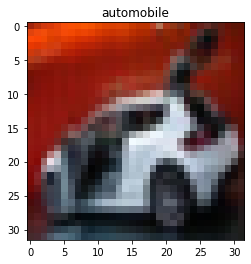

In [5]:
N = 6

plt.imshow(X_test[N])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [6]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu')) # активацию можно прописывать как в самом слое, так и отдельно
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model2.add(Flatten()) 
# полносвязный слой
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
# выходной слой с функцией активации softmax
model2.add(Activation('softmax'))

model2.summary()

# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                        

In [7]:
# Обучаем модель
hist = model2.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 17s 17ms/step - loss: 14.8933 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 2/25
391/391 [==============================] - 6s 15ms/step - loss: 2.3030 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 3/25
391/391 [==============================] - 6s 16ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 4/25
391/391 [==============================] - 6s 16ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/25
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1003
Epoch 6/25
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 7/25
391/391 [==============================] - 6s 16ms/step - loss: 2.3024 - accuracy: 0.0996 - val_loss: 2.3022 - val_accuracy: 0.10

In [8]:
test_score = model2.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.0993
Test loss 2.3026, accuracy 9.93%


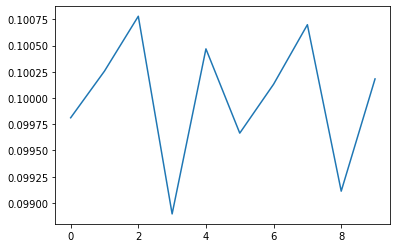

[0.09981155 0.10025654 0.10077931 0.09889517 0.10046834 0.09966516
 0.10013119 0.10069865 0.09911208 0.100182  ]


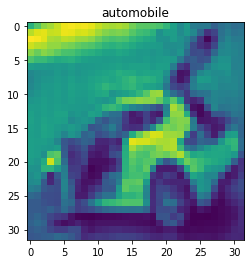

In [9]:
y_pred = model2.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

In [10]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu')) # активацию можно прописывать как в самом слое, так и отдельно
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# полносвязные слои нейронной сети
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model2.add(Flatten()) 
# полносвязный слой
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
# выходной слой с функцией активации softmax
model2.add(Activation('softmax'))

model2.summary()

# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                        

In [12]:
# Обучаем модель
hist = model2.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=256, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
196/196 [==============================] - 6s 31ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/25
196/196 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/25
196/196 [==============================] - 6s 30ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/25
196/196 [==============================] - 6s 30ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/25
196/196 [==============================] - 6s 30ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/25
196/196 [==============================] - 6s 30ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/25
196/196 [==============================] - 5s 28ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/25
196/196 [=====================

In [22]:
tf.keras.backend.clear_session()
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [23]:
# Обучаем модель
hist = model.fit(x=X_train,y=y_train, epochs=25,
                 batch_size=128, validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/25
391/391 [==============================] - 10s 24ms/step - loss: 2.5249 - accuracy: 0.1791 - val_loss: 1.9169 - val_accuracy: 0.3199
Epoch 2/25
391/391 [==============================] - 9s 24ms/step - loss: 1.9764 - accuracy: 0.2795 - val_loss: 1.7303 - val_accuracy: 0.3945
Epoch 3/25
391/391 [==============================] - 9s 24ms/step - loss: 1.7485 - accuracy: 0.3639 - val_loss: 1.5453 - val_accuracy: 0.4530
Epoch 4/25
391/391 [==============================] - 9s 24ms/step - loss: 1.6189 - accuracy: 0.4187 - val_loss: 1.4571 - val_accuracy: 0.4865
Epoch 5/25
391/391 [==============================] - 9s 23ms/step - loss: 1.5076 - accuracy: 0.4649 - val_loss: 1.3017 - val_accuracy: 0.5514
Epoch 6/25
391/391 [==============================] - 9s 23ms/step - loss: 1.4247 - accuracy: 0.5001 - val_loss: 1.3328 - val_accuracy: 0.5384
Epoch 7/25
391/391 [==============================] - 9s 23ms/step - loss: 1.3423 - accuracy: 0.5286 - val_loss: 1.2324 - val_accuracy: 0.572

In [25]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 0.7477 - accuracy: 0.7431
Test loss 0.7477, accuracy 74.31%


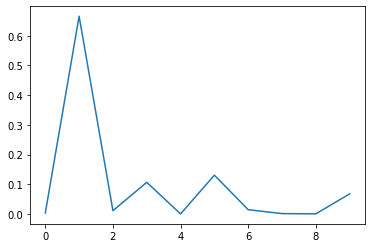

[3.23014171e-03 6.65425658e-01 1.09528499e-02 1.06438205e-01
 1.06520944e-04 1.30475804e-01 1.42710339e-02 1.15657179e-03
 3.13299941e-04 6.76300302e-02]


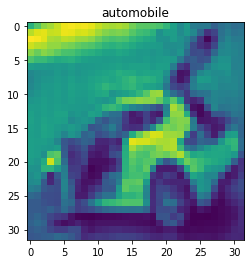

In [27]:
y_pred = model.predict(X_test)
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(labels[np.argmax(y_test[N,:])])
plt.show()

Вывод:
- есть существенные трудности в подборе параметров;
- очевидно увеличение количества ядер смогло увеличить качество созданной сети.